# My code

In [1]:
"""
Source:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedGroupKFold.html#sklearn.model_selection.StratifiedGroupKFold.get_n_splits
"""

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

from utils.common_imports import *

df = pd.read_csv("out/nodule_df.csv")
cv_n_folds = 5 # number of folds for cross-validation

def create_cv_df(nodule_df: pd.DataFrame, cv: StratifiedGroupKFold) -> pd.DataFrame:
    fold_info = {}
    for fold, (train_idxs, test_idxs) in enumerate(
        cv.split(
            X=nodule_df, y=nodule_df["malignancy_consensus"], groups=nodule_df["pid"]
        )
    ):
        fold_info[fold] = {
            "train_idxs": train_idxs,
            "test_idxs": test_idxs,
            "train_pids": nodule_df.loc[train_idxs, "pid"].unique(),
            "test_pids": nodule_df.loc[test_idxs, "pid"].unique(),
            "train_malignancy_distribution": nodule_df["malignancy_consensus"][train_idxs].value_counts().sort_index().to_list(),
            "test_malignancy_distribution": nodule_df["malignancy_consensus"][test_idxs].value_counts().sort_index().to_list(),
            "train_malignancy_distribution_normalised": nodule_df["malignancy_consensus"][train_idxs].value_counts(normalize=True).sort_index().round(2).to_list(),
            "test_malignancy_distribution_normalised": nodule_df["malignancy_consensus"][test_idxs].value_counts(normalize=True).sort_index().round(2).to_list(),
            "train_size": len(train_idxs),
            "test_size": len(test_idxs),
        }

    cv_df = pd.DataFrame(fold_info).T
    return cv_df

cv = StratifiedGroupKFold(n_splits=cv_n_folds, shuffle=True, random_state=42)
cv_df = create_cv_df(df, cv)
# make n_folds fold columns in the nodule_df that indicates which rows are in the train and test set
df = pd.read_csv("out/nodule_df.csv")
cv_n_folds = 5
for fold in range(cv_n_folds):
    df[f"fold_{fold + 1}"] = "no_fold" # initialise all rows to "no_fold"
    df.loc[cv_df.loc[fold, "train_idxs"], f"fold_{fold + 1}"] = "train"
    df.loc[cv_df.loc[fold, "test_idxs"], f"fold_{fold + 1}"] = "test"

df.head()

,index,pid,nodule_idx,ann_mean_diameter,ann_mean_volume,nodule_annotation_ids,nodule_annotation_count,malignancy_scores,subtlety_scores,margin_scores,...,consensus_bbox_128,malignancy_consensus,subtlety_consensus,margin_consensus,cancer_label,fold_1,fold_2,fold_3,fold_4,fold_5
0,0_LIDC-IDRI-0001,LIDC-IDRI-0001,0,32.755812,6989.673615,"(84, 85, 86, 87)",4,"(5, 5, 5, 4)","(5, 5, 5, 5)","(3, 4, 2, 4)",...,"((302, 430), (251, 379), (25, 153))",5,5,3,Malignant,train,train,train,train,test
1,0_LIDC-IDRI-0002,LIDC-IDRI-0002,0,30.781671,7244.667508,"(88, 89)",2,"(5, 4)","(2, 1)","(1, 2)",...,"((297, 425), (281, 409), (121, 249))",5,2,2,Malignant,train,train,train,test,train
2,0_LIDC-IDRI-0003,LIDC-IDRI-0003,0,31.664468,4731.410934,"(102,)",1,"(2,)","(1,)","(2,)",...,"((282, 410), (304, 432), (2, 130))",2,1,2,Benign,train,train,train,test,train
3,1_LIDC-IDRI-0003,LIDC-IDRI-0003,1,31.001964,6519.463698,"(90, 93, 98, 99)",4,"(5, 5, 3, 4)","(5, 5, 5, 5)","(3, 3, 3, 4)",...,"((286, 414), (302, 430), (11, 139))",4,5,3,Malignant,train,train,train,test,train
4,2_LIDC-IDRI-0003,LIDC-IDRI-0003,2,13.309155,472.089669,"(91, 95, 97, 100)",4,"(4, 4, 3, 2)","(4, 4, 3, 3)","(4, 4, 3, 5)",...,"((133, 261), (243, 371), (18, 146))",3,4,4,Ambiguous,train,train,train,test,train


In [241]:
for i in range(cv_n_folds):
    print(f"--- FOLD {i + 1} ---")
    print(f"Train size: {cv_df.loc[i, 'train_size']}")
    print(f"Test size: {cv_df.loc[i, 'test_size']}")
    print(f"Train malignancy distribution (normalised): {cv_df.loc[i, 'train_malignancy_distribution_normalised']}")
    print(f"Test malignancy distribution  (normalised): {cv_df.loc[i, 'test_malignancy_distribution_normalised']}")
    print("")

--- FOLD 1 ---
Train size: 2071
Test size: 554
Train malignancy distribution (normalised): [0.11, 0.24, 0.46, 0.14, 0.04]
Test malignancy distribution  (normalised): [0.1, 0.19, 0.51, 0.15, 0.05]

--- FOLD 2 ---
Train size: 2048
Test size: 577
Train malignancy distribution (normalised): [0.11, 0.22, 0.47, 0.15, 0.04]
Test malignancy distribution  (normalised): [0.09, 0.25, 0.47, 0.14, 0.04]

--- FOLD 3 ---
Train size: 2118
Test size: 507
Train malignancy distribution (normalised): [0.1, 0.23, 0.48, 0.14, 0.04]
Test malignancy distribution  (normalised): [0.14, 0.21, 0.44, 0.17, 0.04]

--- FOLD 4 ---
Train size: 2149
Test size: 476
Train malignancy distribution (normalised): [0.11, 0.23, 0.47, 0.14, 0.04]
Test malignancy distribution  (normalised): [0.1, 0.22, 0.48, 0.15, 0.04]

--- FOLD 5 ---
Train size: 2114
Test size: 511
Train malignancy distribution (normalised): [0.11, 0.22, 0.48, 0.15, 0.04]
Test malignancy distribution  (normalised): [0.12, 0.27, 0.45, 0.11, 0.05]



In [16]:
# validate that the train and test sets are stratified by malignancy and grouped by pid
for fold in range(cv_n_folds):
    print(all(df.groupby("pid")[f"fold_{fold+1}"].nunique() == 1))

True
True
True
True
True


# Visualise created folds

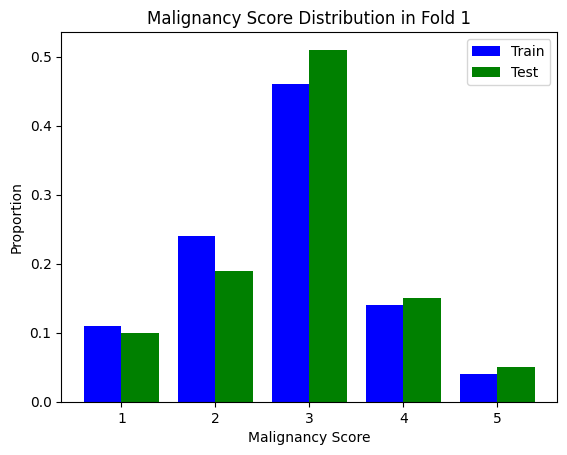

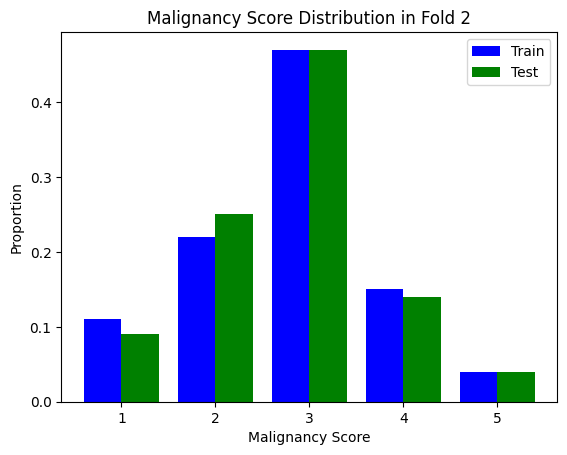

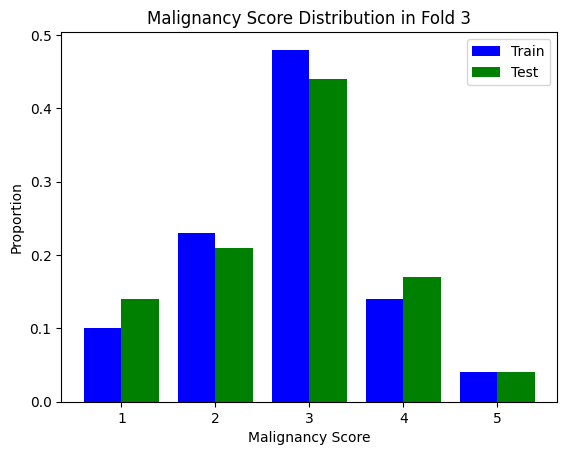

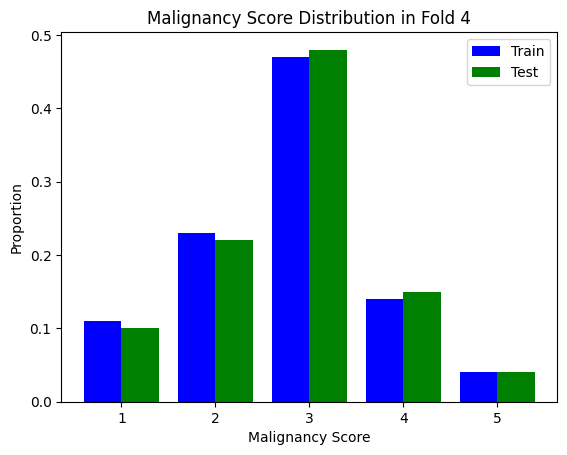

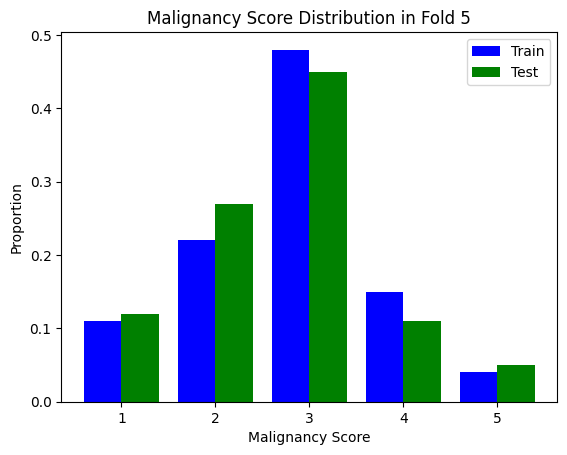

In [242]:
# Visualise the distribution of nodule malignancy scores in the train and test set (for each fold)
cv = StratifiedGroupKFold(n_splits=cv_n_folds, shuffle=True, random_state=42)
cv_df = create_cv_df(df, cv)

bar_width = 0.4
x = list(range(1, cv_n_folds + 1))
for fold in range(cv_n_folds):
    plt.bar(x=[i - bar_width/2 for i in x], height=cv_df["train_malignancy_distribution_normalised"][fold], width=bar_width, color='b', label='Train')
    plt.bar(x=[i + bar_width/2 for i in x], height=cv_df["test_malignancy_distribution_normalised"][fold], width=bar_width, color='g', label='Test')
    plt.xlabel('Malignancy Score')
    plt.ylabel('Proportion')
    plt.title(f'Malignancy Score Distribution in Fold {fold + 1}')
    plt.legend()
    plt.show()

/Users/newuser/Documents/ITU/master_thesis/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


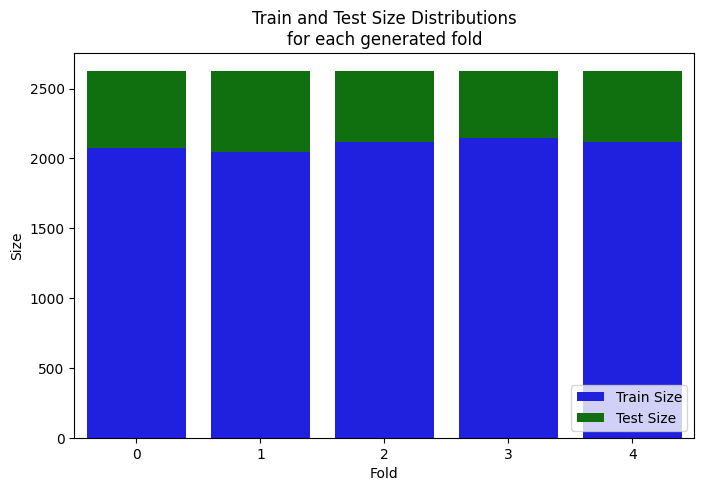

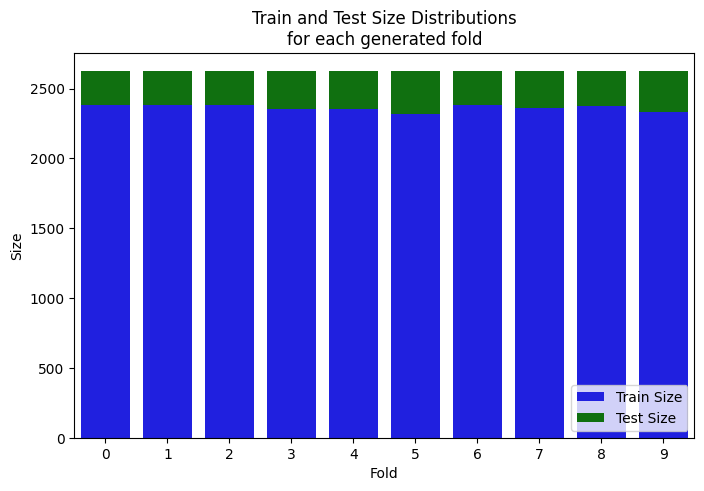

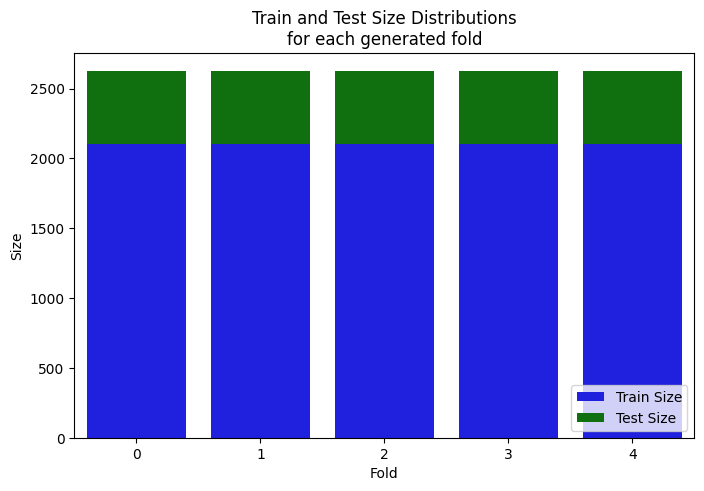

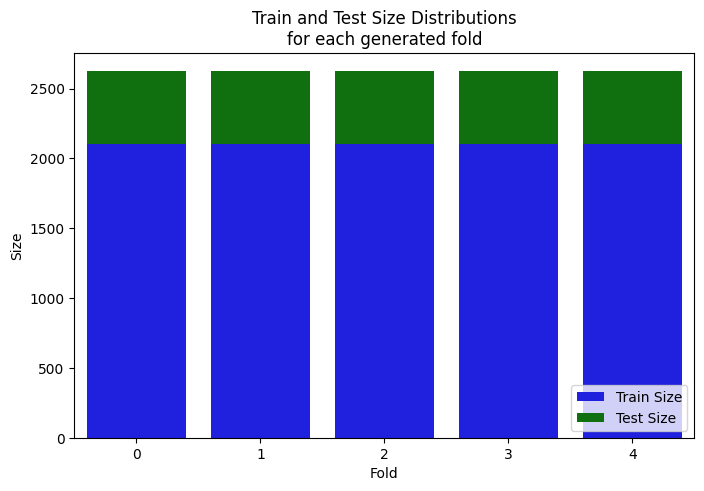

In [243]:
def visualise_folds(cv_df: pd.DataFrame) -> None:
    _, ax = plt.subplots(figsize=(8, 5))
    folds = cv_df.index

    # Plot the nodule distribution between the training and test sets for each fold
    sns.barplot(x=folds, y=cv_df["train_size"], color="b", ax=ax, label="Train Size")
    sns.barplot(
        x=folds,
        y=cv_df["test_size"],
        color="g",
        ax=ax,
        label="Test Size",
        bottom=cv_df["train_size"],
    )
    ax.set_title(f"Train and Test Size Distributions\nfor each generated fold")
    ax.set_xlabel("Fold")
    ax.set_ylabel("Size")
    ax.legend(loc="lower right")

df = pd.read_csv("out/nodule_df.csv")
rs = 42
cvs = [
    StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=rs),
    StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=rs),
    GroupKFold(n_splits=5),
    StratifiedKFold(n_splits=5, shuffle=True, random_state=rs),
]

for cv in cvs:
    cv_df = create_cv_df(df, cv)
    # Visualise the folds:
    visualise_folds(cv_df)